<a href="https://colab.research.google.com/github/AllamElsheikh/Ai_Journey-/blob/main/Star_wars_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This project to know the followin :
##  What is the most seen film ?
##  What is the highest ranked film ?
##  What is the most ranked actor ?

1-Load the data from githup

In [1]:
!pip install pandas requests
import pandas as pd
import requests
import matplotlib.pyplot as plt


In [2]:
file = requests.get("https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv")
with open("starwars.csv" ,"w+") as f:
  f.write(file.text)

In [3]:
df = pd.read_csv("starwars.csv" ,encoding="ISO-8859-1" )
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÅÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
df.shape

(1187, 38)

In [5]:
df.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÅÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


##  What is the most seen film ?


In [6]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [7]:
df_cln = df[["RespondentID",
       "Have you seen any of the 6 films in the Star Wars franchise?",
             "Do you consider yourself to be a fan of the Star Wars film franchise?"]]
df_cln.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,NaN,Response,Response
1,3.292880e+09,Yes,Yes


In [8]:
df_cln.iloc[:,1:].apply(pd.value_counts)


<ipython-input-8-1f5eeaad41a5>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_cln.iloc[:,1:].apply(pd.value_counts)
<ipython-input-8-1f5eeaad41a5>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_cln.iloc[:,1:].apply(pd.value_counts)


,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
Yes,936,552
No,250,284
Response,1,1


In [9]:
yes_no = {
    "Yes": True,
    "No": False
}

In [10]:
df_cln['Have you seen any of the 6 films in the Star Wars franchise?'] = df_cln['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
df_cln['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df_cln['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

<ipython-input-10-6fef5307710c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['Have you seen any of the 6 films in the Star Wars franchise?'] = df_cln['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
<ipython-input-10-6fef5307710c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df_cln['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


In [11]:
df_cln = df_cln.merge(df.iloc[:,3:9].copy() , left_index=True , right_index=True).drop_duplicates()
df_cln.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [12]:
df_cln.iloc[:,3:9] = df_cln.iloc[:,3:9].notnull()

In [13]:
df_cln.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,True,True,True,True,True,True
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True


In [14]:
columns = ['id' , 'seen_any' , 'fan' , 'seen_1' , 'seen_2' , 'seen_3' , 'seen_4' , 'seen_5' , 'seen_6']
df_cln.columns = columns
df_cln.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,NaN,NaN,NaN,True,True,True,True,True,True
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True


In [15]:
df_cln.iloc[:,1:].apply(pd.value_counts)



<ipython-input-15-b8f3e9615030>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_cln.iloc[:,1:].apply(pd.value_counts)
<ipython-input-15-b8f3e9615030>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_cln.iloc[:,1:].apply(pd.value_counts)
<ipython-input-15-b8f3e9615030>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_cln.iloc[:,1:].apply(pd.value_counts)
<ipython-input-15-b8f3e9615030>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_cln.iloc[:,1:].apply(pd.value_counts)
<ipython-input-15-b8f3e9615030>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
False,250,284,513,615,636,579,428,448
True,936,552,674,572,551,608,759,739


In [16]:
percent = df_cln.iloc[:,1:].apply(pd.value_counts) / df_cln.iloc[:,1:].apply(lambda x: x.count())


<ipython-input-16-d06e7605f1ac>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percent = df_cln.iloc[:,1:].apply(pd.value_counts) / df_cln.iloc[:,1:].apply(lambda x: x.count())
<ipython-input-16-d06e7605f1ac>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percent = df_cln.iloc[:,1:].apply(pd.value_counts) / df_cln.iloc[:,1:].apply(lambda x: x.count())
<ipython-input-16-d06e7605f1ac>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percent = df_cln.iloc[:,1:].apply(pd.value_counts) / df_cln.iloc[:,1:].apply(lambda x: x.count())
<ipython-input-16-d06e7605f1ac>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percent = df_cln.iloc[:,1:

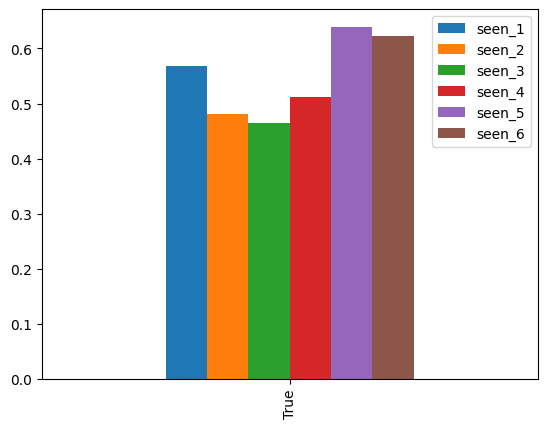

In [17]:
percent.iloc[1:,2:8].plot(kind="bar")
plt.savefig('seen_film.png', dpi=300, bbox_inches='tight')  # Saving with 300 DPI

**The most seen film is fiths film**

##  What is the highest ranked film ?


In [18]:
df.iloc[:,9:15].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


In [19]:
df_cln = df_cln.merge(df.iloc[:,9:15].copy(), left_index=True, right_index=True)


In [20]:
df_cln = df_cln.drop(0)



In [21]:
df_cln.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3


In [22]:

df_cln.iloc[:,9].dtype


dtype('O')

In [23]:
df_cln[df_cln.columns[9:]] = df_cln[df_cln.columns[9:]].astype(float)


In [24]:

df_cln.iloc[:,9].dtype


dtype('float64')

In [25]:
columns += ['rank_1' , 'rank_2' , 'rank_3' , 'rank_4' , 'rank_5' , 'rank_6']
df_cln.columns = columns
df_cln.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0


In [26]:
df_cln.iloc[:,9:].mean()


,0
rank_1,3.732934
rank_2,4.087321
rank_3,4.341317
rank_4,3.272727
rank_5,2.513158
rank_6,3.047847


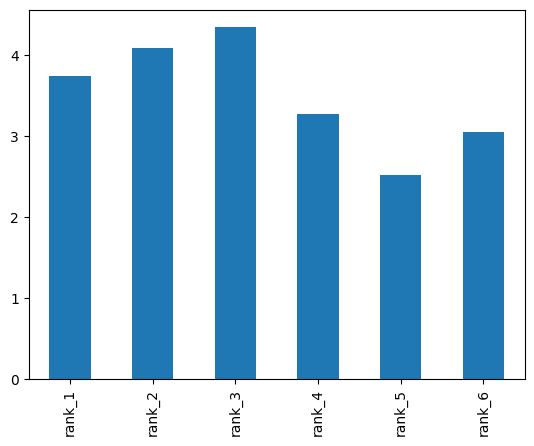

In [27]:
df_cln.iloc[:,9:15].mean().plot.bar()
plt.savefig('film_rank.png', dpi=300, bbox_inches='tight')  # Saving with 300 DPI

**The moost ranked film is the the third part**

##  What is the most ranked actor ?

In [28]:
df.iloc[:,15].unique()

array(['Han Solo', 'Very favorably', nan, 'Somewhat favorably',
       'Neither favorably nor unfavorably (neutral)',
       'Somewhat unfavorably', 'Unfamiliar (N/A)', 'Very unfavorably'],
      dtype=object)

In [29]:
fav_map = {
    'Very favorably': 5 ,
   'Somewhat favorably' : 4,
     'Neither favorably nor unfavorably (neutral)' : 3,
       'Somewhat unfavorably' : 2,
     'Unfamiliar (N/A)': 1,
      'Very unfavorably' : 0
}

In [30]:
#df_cln = df_cln.merge(df.iloc[:,9:15].copy(), left_index=True, right_index=True)


In [31]:
df_cln = df_cln.merge(df.iloc[:,15:29].drop(0).copy(), left_index=True, right_index=True)
df_cln.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [32]:
df_cln.shape

(1186, 29)

In [33]:
df_cln.iloc[:, 15:29] = df_cln.iloc[:, 15:29].replace(fav_map)


<ipython-input-33-07cdb5e100f4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cln.iloc[:, 15:29] = df_cln.iloc[:, 15:29].replace(fav_map)


In [34]:
df.iloc[0:1, 15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


In [35]:
columns += ['Han Solo',	'Luke Skywalker',	'Princess Leia Organa',	'Anakin Skywalker'	,'Obi Wan Kenobi'	,
            'Emperor Palpatine',	'Darth Vader',	'Lando Calrissian',	'Boba Fett',	'C-3P0',	'R2 D2',
            'Jar Jar Binks' ,	'Padme Amidala'	,'Yoda']
len(columns)

29

In [36]:
df_cln.shape

(1186, 29)

In [37]:
df_cln.columns = columns
df_cln.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,5.0,0.0,4.0,3.0,5.0,4.0,4.0,0.0,4.0,4.0


In [38]:
df_cln.iloc[:,16].dtype


dtype('O')

In [39]:
df_cln[df_cln.columns[15:]] = df_cln[df_cln.columns[15:]].astype(float)
df_cln.iloc[:,16].dtype


dtype('float64')

In [40]:
numbers = []
for c in df_cln:
  if df_cln[c].dtype == 'float64':
    numbers.append(c)

In [41]:
for num in numbers :
    df_cln[num].fillna(df_cln[num].mean() , inplace=True)

<ipython-input-41-88507c8d009c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cln[num].fillna(df_cln[num].mean() , inplace=True)


In [42]:
df_cln.isnull().sum()

,0
id,0
seen_any,0
fan,350
seen_1,0
seen_2,0
seen_3,0
seen_4,0
seen_5,0
seen_6,0
rank_1,0


In [43]:
df_cln.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,rank_1,...,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,3.292880e+09,True,True,True,True,True,True,True,True,3.000000,...,5.000000,5.000000,5.000000,1.00000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000
2,3.292880e+09,False,NaN,False,False,False,False,False,False,3.732934,...,4.549091,2.522113,3.268765,3.15122,2.918719,4.333736,4.519277,2.295981,3.038084,4.576271
3,3.292765e+09,True,False,True,True,True,False,False,False,1.000000,...,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,3.292763e+09,True,True,True,True,True,True,True,True,5.000000,...,5.000000,4.000000,5.000000,4.00000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000
5,3.292731e+09,True,True,True,True,True,True,True,True,5.000000,...,5.000000,0.000000,4.000000,3.00000,5.000000,4.000000,4.000000,0.000000,4.000000,4.000000


In [44]:
df_cln.iloc[:,15:].mean()

,0
Han Solo,4.604343
Luke Skywalker,4.551143
Princess Leia Organa,4.513839
Anakin Skywalker,3.552855
Obi Wan Kenobi,4.549091
Emperor Palpatine,2.522113
Darth Vader,3.268765
Lando Calrissian,3.151220
Boba Fett,2.918719
C-3P0,4.333736


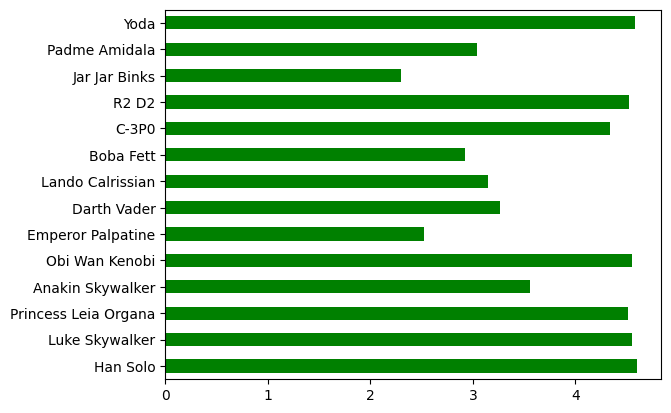

In [45]:
df_cln.iloc[:,15:].mean().plot.barh(color="green")
plt.savefig('actors_rank.png', dpi=300, bbox_inches='tight')  # Saving with 300 DPI